<div class="alert alert-block alert-warning">
<h1> Orient Food Delivery Data Science Project - Product Segmentation</h1>
</div>

<div class="alert alert-block alert-info">
<h2>Mains Steps</h2>
<ol style="list-style-type: decimal-leading-zero; padding-bottom: 0;">
    <li><h3>Business Statement</h3></li>
    <li><h3>Business Data Understanding</h3></li>
    <li><h3>Data Wrangling</h3></li>
    <li><h3>Feature Engineering</h3></li>
    <li><h3>Exploratory Analysis</h3></li>
    <li><h3>Business Oportunity - Products Combos by Client Orders</h3></li>
    <li><h3>Business Oportunity - Data Classification by Machine Learning</h3></li>
    <li><h3>Conclusions and Insights</h3></li>
</ol>
</div>

<div class="alert alert-block alert-info">
<h2>01. Business Statement</h2>

> The Orient Food Delivery, OFD, needs know its sales standars more deeply.

> The object is to figure out business oportunities to growth sales with product combinations that match by clients orders.

> These opportunities must be documented in order to send business board of company

> During the project it will be a must, nice to have, clients group by some way in order to explorer marketing initiatives.

</div>

<div class="alert alert-block alert-info">
<h2>02. Business Data Understanding</h2>

> The business data is deliveried as a CVS file.

> First of all, it´s necessary create a OFD Data Dictionary of these data "AS IS".

</div>

In [1]:
# Imports

# Data Visualization and Manupulation
import time
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as m
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Text Combinations e Count
from itertools import combinations
from collections import Counter

# Plots Format
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
%matplotlib inline

<div class="alert alert-block alert-info">
<h2>02. Business Data Understanding</h2>
<h3>02.1 Open, Show Document Information of CSV File</h3>
</div>

In [2]:
# Read the data file with the header as first line and semicolon as the delimiting character.
dfPureData = pd.read_csv("data/OrientFoodDelivery.csv",header=0, sep=";")

In [3]:
# Figure out the shape of this file (9110 Observations and 15 Collumns)
dfPureData.shape

(9110, 15)

In [4]:
# Displaying Some Data
dfPureData.head()

,Date,Sale_ID,Product_ID,Product_Name,Portion,Product_Type,Preparation,Product_Value,Payment_Method,Sales_Channel,Sale_City,District_ID,District_Name,City_Region,Client_Sex
0,01/09/2018,47917.0,3.0,Chicken Yakisoba 1Pe,1 Person,Food,Cooked,28.90,Payment On-line,Ifood,Sao Paulo,18.0,Eucalyptus Forest,South,Male
1,01/09/2018,47918.0,47.0,Chess Chicken / Samurai Rice,2 Persons,Food,Cooked,30.90,Credit,N/I,Sao Paulo,97.0,American Garden,East,Female
2,01/09/2018,47918.0,49.0,Hot Roll Katana,2 Units,Food,Fried,16.90,Credit,N/I,Sao Paulo,97.0,American Garden,East,Female
3,01/09/2018,47919.0,47.0,Chess Chicken / Samurai Rice,2 Persons,Food,Cooked,30.90,Credit,N/I,Sao Paulo,179.0,Sant Ines Garden I,East,Female
4,01/09/2018,47920.0,49.0,Hot Roll Katana,2 Units,Food,Fried,16.90,Cash,N/I,Sao Paulo,146.0,Marian Garden,East,Male


<div class="alert alert-block alert-info">
<h2>02. Business Data Understanding</h2>
<h3>02.2 Data Dictionary from CSV File Provided</h3>
</div>
 
 Data Dictionary
 
Field | Meaning
------------ | -------------
 Date | Sale Date
Sale_ID | Transaction ID from one sale. One Sale_ID can appears more than once due its number of items.
Product_Name | Name of the product.
Portion | It is a portion type of product.
Product_Type | It is a product type. Ex. Food, Drink, Dessert, Complement
Preparation | It is product item preparation type.
Product_Value | It is product item price.
Payment_Method | It is payment mode.
Sales_Channel | It is a Sales Channel as Ifood, Uber Eats, etc.
Sale_City | It is the city name of sale.
District_ID | It district id of sale.
District_Name | It is district name of sale.
City_Region | It is District Region of sale like South, East and so on.
Client_Sex | It is a client sex, showing by its name.

<div class="alert alert-block alert-info">
<h1>03. Data Wrangling</h1>

> Find information with too many missing values.

> Find information with insufficient number of occurrences for business analysis.
    
> Find and correct wrong information contents.
    
> Dicard not relevant information for the project.

</div>

<div class="alert alert-block alert-info">
<h2>03. Data Wrangling</h2>
<h3>03.1 Missing Values Investigation</h3>
</div>

In [5]:
print ("Data Missing Values Percentage %")
print (" ")
print (round((dfPureData.isnull().sum() * 100/ len(dfPureData)),2).sort_values(ascending=False))

Data Missing Values Percentage %
 
Client_Sex        88.10
Portion            3.81
Product_ID         0.07
Product_Name       0.07
Product_Type       0.07
Preparation        0.07
Date               0.01
Sale_ID            0.01
Product_Value      0.01
Payment_Method     0.01
Sales_Channel      0.01
Sale_City          0.01
District_ID        0.01
District_Name      0.01
City_Region        0.01
dtype: float64


#### It seems that Client_Sex can be discard due its high missing values percentage. Before discard Client_Sex field, it is health generate some statistics of it to be inform to.

In [6]:
print("Client_Sex Field Missing Values Number is " + str(dfPureData.Client_Sex.isnull().sum()) +  \
      " of Total " + str(len(dfPureData)) + " Observations!") 

Client_Sex Field Missing Values Number is 8026 of Total 9110 Observations!


In [7]:
# Client_Sex Field really seems to be candidate to discard.
# Discorver more information about this Field in the context.
dfPureData.Client_Sex.value_counts()

Female    588
Male      496
Name: Client_Sex, dtype: int64

In [8]:
dfPureData.Client_Sex.describe()
# It seems that Female Sex is more frequent that Male, 
# but Client_Sex observations number IS NOT ENOUGH to this conclusion aganst number total observations.

count       1084
unique         2
top       Female
freq         588
Name: Client_Sex, dtype: object

In [9]:
# Discard Client_Sex Column
dfPureData.drop('Client_Sex',axis=1,inplace=True)

In [10]:
dfPureData.head()

,Date,Sale_ID,Product_ID,Product_Name,Portion,Product_Type,Preparation,Product_Value,Payment_Method,Sales_Channel,Sale_City,District_ID,District_Name,City_Region
0,01/09/2018,47917.0,3.0,Chicken Yakisoba 1Pe,1 Person,Food,Cooked,28.90,Payment On-line,Ifood,Sao Paulo,18.0,Eucalyptus Forest,South
1,01/09/2018,47918.0,47.0,Chess Chicken / Samurai Rice,2 Persons,Food,Cooked,30.90,Credit,N/I,Sao Paulo,97.0,American Garden,East
2,01/09/2018,47918.0,49.0,Hot Roll Katana,2 Units,Food,Fried,16.90,Credit,N/I,Sao Paulo,97.0,American Garden,East
3,01/09/2018,47919.0,47.0,Chess Chicken / Samurai Rice,2 Persons,Food,Cooked,30.90,Credit,N/I,Sao Paulo,179.0,Sant Ines Garden I,East
4,01/09/2018,47920.0,49.0,Hot Roll Katana,2 Units,Food,Fried,16.90,Cash,N/I,Sao Paulo,146.0,Marian Garden,East


In [11]:
# Missing Values Investigation of Product_Name
print (dfPureData[dfPureData["Product_Name"].isnull()].index.tolist())

[5688, 5724, 5725, 6199, 6424, 9109]


In [12]:
dfPureData.drop([5688, 5724, 5725, 6199, 6424, 9109], inplace=True)

print (dfPureData[dfPureData["Product_Name"].isnull()].index.tolist())

[]


In [13]:
# Check again Missing Values Percentage 
print ("Data Missing Values Percentage %")
print (" ")
print (round((dfPureData.isnull().sum() * 100/ len(dfPureData)),2).sort_values(ascending=False))

Data Missing Values Percentage %
 
Portion           3.75
Date              0.00
Sale_ID           0.00
Product_ID        0.00
Product_Name      0.00
Product_Type      0.00
Preparation       0.00
Product_Value     0.00
Payment_Method    0.00
Sales_Channel     0.00
Sale_City         0.00
District_ID       0.00
District_Name     0.00
City_Region       0.00
dtype: float64


<div class="alert alert-block alert-info">
<h2>03. Data Wrangling</h2>
<h3>03.2 Wrong Information Contents Investigation</h3>
</div>

In [14]:
# Product Name seems need some clean action to delete "w/" and "w /" of its content.
print(dfPureData.Product_Name.unique())

['Chicken Yakisoba 1Pe' 'Chess Chicken / Samurai Rice' 'Hot Roll Katana'
 'Banana Spring Roll w / Chocolate 3uG' 'Chicken Bacon Yakisoba 1Pe'
 'Meat Yakisoba 1Pe' 'Filet Mignon Yakisoba 1Pe' 'Shrimp Yakisoba 1Pe'
 'Yaki China 1pe' 'Mixed Yakisoba 1Pe' 'Samurai Fortune Cookie'
 'Bid China Spring Roll' 'Vegetarian Yakisoba 1Pe' 'Chinese Pastel 1Per'
 'Spring Roll 3 Cheeses 3uG' 'Spring Roll Vegetables 3uG'
 'Spring Roll Romeo and Juliet 3uG' 'Pork Loin Yakisoba 1Pe'
 'Bacon Yakisoba 1Pe' 'Yaki Samurai' 'Bid Chicken Chess Dojo'
 'Spring Roll Shrimp w / Catupiry 3uG' 'Special Samurai Yakisoba 2pe'
 'Spring Roll Chicken w/ Cream Cheese 3uG' 'Kit Kids']


In [15]:
dfPureData["Product_Name"] = dfPureData["Product_Name"].str.replace("w/ ","", case = False)
dfPureData["Product_Name"] = dfPureData["Product_Name"].str.replace("w /","", case = False)
dfPureData["Product_Name"] = dfPureData["Product_Name"].str.replace("/","", case = False)
dfPureData["Product_Name"] = dfPureData["Product_Name"].str.replace("  "," ")
dfPureData["Product_Name"] = dfPureData["Product_Name"].str.replace("   "," ")

print(dfPureData.Product_Name.unique())

['Chicken Yakisoba 1Pe' 'Chess Chicken Samurai Rice' 'Hot Roll Katana'
 'Banana Spring Roll Chocolate 3uG' 'Chicken Bacon Yakisoba 1Pe'
 'Meat Yakisoba 1Pe' 'Filet Mignon Yakisoba 1Pe' 'Shrimp Yakisoba 1Pe'
 'Yaki China 1pe' 'Mixed Yakisoba 1Pe' 'Samurai Fortune Cookie'
 'Bid China Spring Roll' 'Vegetarian Yakisoba 1Pe' 'Chinese Pastel 1Per'
 'Spring Roll 3 Cheeses 3uG' 'Spring Roll Vegetables 3uG'
 'Spring Roll Romeo and Juliet 3uG' 'Pork Loin Yakisoba 1Pe'
 'Bacon Yakisoba 1Pe' 'Yaki Samurai' 'Bid Chicken Chess Dojo'
 'Spring Roll Shrimp Catupiry 3uG' 'Special Samurai Yakisoba 2pe'
 'Spring Roll Chicken Cream Cheese 3uG' 'Kit Kids']


<div class="alert alert-block alert-info">
<h2>03. Data Wrangling</h2>
<h3>03.3 Wrong Information Contents Investigation - Each File Information</h3>
</div>

In [16]:
# Checking Sale Date Column
print(dfPureData.Date.describe())
print()
print(dfPureData.Date.value_counts)
# It seems OK!

count           9104
unique           229
top       20/05/2018
freq             108
Name: Date, dtype: object

<bound method IndexOpsMixin.value_counts of 0       01/09/2018
1       01/09/2018
2       01/09/2018
3       01/09/2018
4       01/09/2018
           ...    
9104    19/01/2018
9105    19/01/2018
9106    19/01/2018
9107    19/01/2018
9108    19/01/2018
Name: Date, Length: 9104, dtype: object>


In [17]:
# Checking Sale ID Column
print(dfPureData.Sale_ID.describe())
print()
print(dfPureData.Sale_ID.value_counts)
# It seems OK!

count     9104.000000
mean     44920.330844
std       2095.301484
min      41161.000000
25%      43187.750000
50%      44789.500000
75%      46552.250000
max      48686.000000
Name: Sale_ID, dtype: float64

<bound method IndexOpsMixin.value_counts of 0       47917.0
1       47918.0
2       47918.0
3       47919.0
4       47920.0
         ...   
9104    41712.0
9105    41712.0
9106    41713.0
9107    41713.0
9108    41713.0
Name: Sale_ID, Length: 9104, dtype: float64>


In [18]:
# Checking Product ID Column
print(dfPureData.Product_ID.describe())
print()
print(dfPureData.Product_ID.value_counts)
# It seems OK!

count    9104.000000
mean       19.869618
std        16.647730
min         1.000000
25%         7.000000
50%        13.000000
75%        37.000000
max        52.000000
Name: Product_ID, dtype: float64

<bound method IndexOpsMixin.value_counts of 0        3.0
1       47.0
2       49.0
3       47.0
4       49.0
        ... 
9104     7.0
9105    39.0
9106    37.0
9107    21.0
9108    44.0
Name: Product_ID, Length: 9104, dtype: float64>


In [19]:
# Checking Product Name Column
print(dfPureData.Product_Name.describe())
print()
print(dfPureData.Product_Name.value_counts)
# It seems OK!

count                   9104
unique                    25
top       Mixed Yakisoba 1Pe
freq                    2246
Name: Product_Name, dtype: object

<bound method IndexOpsMixin.value_counts of 0                   Chicken Yakisoba 1Pe
1             Chess Chicken Samurai Rice
2                        Hot Roll Katana
3             Chess Chicken Samurai Rice
4                        Hot Roll Katana
                      ...               
9104                   Meat Yakisoba 1Pe
9105    Banana Spring Roll Chocolate 3uG
9106           Spring Roll 3 Cheeses 3uG
9107                        Yaki Samurai
9108        Special Samurai Yakisoba 2pe
Name: Product_Name, Length: 9104, dtype: object>


In [20]:
# Checking Portion Column
print(dfPureData.Portion.describe())
print()
print(dfPureData.Portion.value_counts)
# As Missing Values Percentage shows above, there are 3.81 % of missing values, but its indice is acceptable.
# 9104 - 8763 = 341 Missing Values

count         8763
unique           6
top       1 Person
freq          6863
Name: Portion, dtype: object

<bound method IndexOpsMixin.value_counts of 0        1 Person
1       2 Persons
2         2 Units
3       2 Persons
4         2 Units
          ...    
9104     1 Person
9105    3 Units G
9106    3 Units G
9107     1 Person
9108    2 Persons
Name: Portion, Length: 9104, dtype: object>


In [21]:
# Checking Product Type Column
print(dfPureData.Product_Type.describe())
print()
print(dfPureData.Product_Type.value_counts)
# It seems OK!

count     9104
unique       1
top       Food
freq      9104
Name: Product_Type, dtype: object

<bound method IndexOpsMixin.value_counts of 0       Food
1       Food
2       Food
3       Food
4       Food
        ... 
9104    Food
9105    Food
9106    Food
9107    Food
9108    Food
Name: Product_Type, Length: 9104, dtype: object>


In [22]:
# Checking Preparation Column
print(dfPureData.Preparation.describe())
print()
print(dfPureData.Preparation.value_counts)
# It seems OK!

count       9104
unique         3
top       Cooked
freq        7162
Name: Preparation, dtype: object

<bound method IndexOpsMixin.value_counts of 0       Cooked
1       Cooked
2        Fried
3       Cooked
4        Fried
         ...  
9104    Cooked
9105     Fried
9106     Fried
9107    Cooked
9108    Cooked
Name: Preparation, Length: 9104, dtype: object>


In [23]:
# Checking Product Value Column
print(dfPureData.Product_Value.describe())
print()
print(dfPureData.Product_Value.value_counts)
# It seems OK!

# Checking all its content is number
print("Checking all its content is number. If return is False, there is something wrong with some contents of it.")
pd.to_numeric(dfPureData['Product_Value'], errors='coerce').notnull().all()
# It seems is not ok!


count       9104
unique       170
top       32.90 
freq         761
Name: Product_Value, dtype: object

<bound method IndexOpsMixin.value_counts of 0       28.90 
1       30.90 
2       16.90 
3       30.90 
4       16.90 
         ...  
9104    30.50 
9105     8.90 
9106    14.90 
9107    31.50 
9108    41.50 
Name: Product_Value, Length: 9104, dtype: object>
Checking all its content is number. If return is False, there is something wrong with some contents of it.


False

In [24]:
# Convert to Float to have some tip about what is wrong with this field
dfPureData.Product_Value = dfPureData.Product_Value.astype(np.float64)

ValueError: could not convert string to float: '-   '

In [25]:
# How message error shows, there is a hiphen as value in some line
# Need replace this invalid value to a valid one
# Let´s find de line
dfPureData[dfPureData["Product_Value"].str.contains("-")==True]

,Date,Sale_ID,Product_ID,Product_Name,Portion,Product_Type,Preparation,Product_Value,Payment_Method,Sales_Channel,Sale_City,District_ID,District_Name,City_Region
6777,09/03/2018,42850.0,13.0,Mixed Yakisoba 1Pe,1 Person,Food,Cooked,-,Credit,N/I,Sao Paulo,172.0,Portugal Garden,South


In [26]:
# Let´s describe the standard price of this specific product e update this specific with it.
dfPureData[dfPureData["Product_Name"] == "Mixed Yakisoba 1Pe"].Product_Value.describe()

count       2246
unique        54
top       32.90 
freq         730
Name: Product_Value, dtype: object

In [27]:
# Update the specific line with the most value repeated for this field
dfPureData.at[6777,"Product_Value"] = '32.90'

# Let´s check again
dfPureData[dfPureData["Product_Value"].str.contains("-")==True]

# Seem to OK now!

,Date,Sale_ID,Product_ID,Product_Name,Portion,Product_Type,Preparation,Product_Value,Payment_Method,Sales_Channel,Sale_City,District_ID,District_Name,City_Region


In [28]:
# Checking Payment Method Column
print(dfPureData.Payment_Method.describe())
print()
print(dfPureData.Payment_Method.value_counts)
# It seems OK!

count       9104
unique         3
top       Credit
freq        5264
Name: Payment_Method, dtype: object

<bound method IndexOpsMixin.value_counts of 0       Payment On-line
1                Credit
2                Credit
3                Credit
4                  Cash
             ...       
9104             Credit
9105             Credit
9106             Credit
9107             Credit
9108             Credit
Name: Payment_Method, Length: 9104, dtype: object>


In [29]:
# Checking Product Value Column
print(dfPureData.Sales_Channel.describe())
print()
print(dfPureData.Sales_Channel.value_counts)
# It seems there a lot of missing values called N/I content

count     9104
unique       2
top        N/I
freq      8868
Name: Sales_Channel, dtype: object

<bound method IndexOpsMixin.value_counts of 0       Ifood
1         N/I
2         N/I
3         N/I
4         N/I
        ...  
9104      N/I
9105      N/I
9106      N/I
9107      N/I
9108      N/I
Name: Sales_Channel, Length: 9104, dtype: object>


In [30]:
# Discard Sales_Channel Column
dfPureData.drop('Sales_Channel',axis=1,inplace=True)

In [31]:
# Checking Sale City Column
print(dfPureData.Sale_City.describe())
print()
print(dfPureData.Sale_City.value_counts)
# It seems OK!

count          9104
unique            2
top       Sao Paulo
freq           9080
Name: Sale_City, dtype: object

<bound method IndexOpsMixin.value_counts of 0       Sao Paulo
1       Sao Paulo
2       Sao Paulo
3       Sao Paulo
4       Sao Paulo
          ...    
9104    Sao Paulo
9105    Sao Paulo
9106    Sao Paulo
9107    Sao Paulo
9108    Sao Paulo
Name: Sale_City, Length: 9104, dtype: object>


In [32]:
# Checking District ID Column
print(dfPureData.District_ID.describe())
print()
print(dfPureData.District_ID.value_counts)
# It seems OK!

count    9104.000000
mean      122.599627
std       129.652555
min         0.000000
25%         0.000000
50%        97.000000
75%       197.000000
max       532.000000
Name: District_ID, dtype: float64

<bound method IndexOpsMixin.value_counts of 0        18.0
1        97.0
2        97.0
3       179.0
4       146.0
        ...  
9104     97.0
9105     97.0
9106     97.0
9107     97.0
9108     97.0
Name: District_ID, Length: 9104, dtype: float64>


In [33]:
# Checking District Name Column
print(dfPureData.District_Name.describe())
print()
print(dfPureData.District_Name.value_counts)
# It seems OK!

count       9104
unique       105
top       Balcão
freq        2435
Name: District_Name, dtype: object

<bound method IndexOpsMixin.value_counts of 0        Eucalyptus Forest
1          American Garden
2          American Garden
3       Sant Ines Garden I
4            Marian Garden
               ...        
9104       American Garden
9105       American Garden
9106       American Garden
9107       American Garden
9108       American Garden
Name: District_Name, Length: 9104, dtype: object>


In [34]:
# Checking City Region Column
print(dfPureData.City_Region.describe())
print()
print(dfPureData.City_Region.value_counts)
# It seems OK!

count      9104
unique        7
top       South
freq       5724
Name: City_Region, dtype: object

<bound method IndexOpsMixin.value_counts of 0       South
1        East
2        East
3        East
4        East
        ...  
9104     East
9105     East
9106     East
9107     East
9108     East
Name: City_Region, Length: 9104, dtype: object>


In [35]:
dfPureData.shape

(9104, 13)

In [36]:
dfPureData.dtypes

Date               object
Sale_ID           float64
Product_ID        float64
Product_Name       object
Portion            object
Product_Type       object
Preparation        object
Product_Value      object
Payment_Method     object
Sale_City          object
District_ID       float64
District_Name      object
City_Region        object
dtype: object

In [37]:
# Serialize
dfPureData.to_csv("data/OrientFoodDelivery_Cleaned.csv")

In [38]:
# Read from Serialized CSV File
dfDataCleaned = pd.read_csv("data/OrientFoodDelivery_Cleaned.csv",header=0, sep=",")

<div class="alert alert-block alert-info">
<h1>04. Feature Engineering</h1>

> Create or Derive more Information to help data structure in order to provide better analysis.

</div>

<div class="alert alert-block alert-info">
<h2>04. Feature Engineering</h2>
<h3>04.1 Create More Detailed Information from Others</h3>
</div>

In [39]:
# Split Sale Date in Day, Mounth, Year, Day of Week and Week Number
dfDataCleaned["Date"] = pd.to_datetime(dfDataCleaned["Date"])
dfDataCleaned["Sale_Year"] = dfDataCleaned["Date"].dt.year
dfDataCleaned["Sale_Mounth"] = dfDataCleaned["Date"].dt.month
dfDataCleaned["Sale_Day"] = dfDataCleaned["Date"].dt.day
dfDataCleaned["Sale_Day_Week"] = dfDataCleaned["Date"].dt.day_name()
dfDataCleaned["Sale_Week_Num"] = dfDataCleaned["Date"].dt.week

dfDataCleaned.head()

<ipython-input-39-b7e7a6f963fd>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dfDataCleaned["Sale_Week_Num"] = dfDataCleaned["Date"].dt.week


,Unnamed: 0,Date,Sale_ID,Product_ID,Product_Name,Portion,Product_Type,Preparation,Product_Value,Payment_Method,Sale_City,District_ID,District_Name,City_Region,Sale_Year,Sale_Mounth,Sale_Day,Sale_Day_Week,Sale_Week_Num
0,0,2018-01-09,47917.0,3.0,Chicken Yakisoba 1Pe,1 Person,Food,Cooked,28.9,Payment On-line,Sao Paulo,18.0,Eucalyptus Forest,South,2018,1,9,Tuesday,2
1,1,2018-01-09,47918.0,47.0,Chess Chicken Samurai Rice,2 Persons,Food,Cooked,30.9,Credit,Sao Paulo,97.0,American Garden,East,2018,1,9,Tuesday,2
2,2,2018-01-09,47918.0,49.0,Hot Roll Katana,2 Units,Food,Fried,16.9,Credit,Sao Paulo,97.0,American Garden,East,2018,1,9,Tuesday,2
3,3,2018-01-09,47919.0,47.0,Chess Chicken Samurai Rice,2 Persons,Food,Cooked,30.9,Credit,Sao Paulo,179.0,Sant Ines Garden I,East,2018,1,9,Tuesday,2
4,4,2018-01-09,47920.0,49.0,Hot Roll Katana,2 Units,Food,Fried,16.9,Cash,Sao Paulo,146.0,Marian Garden,East,2018,1,9,Tuesday,2


In [40]:
# Save now with Feature Engineering Applied as CSV File
dfDataCleaned.to_csv("data/OrientFoodDelivery_Featured.csv")

In [41]:
# Read from CSV File
dfDataFeatured = pd.read_csv("data/OrientFoodDelivery_Featured.csv",header=0, sep=",")

<div class="alert alert-block alert-info">
<h2>04. Feature Engineering</h2>
<h3>04.2 Internal Convertions - Categorical, Numeric and DateTime Types</h3>
</div>

In [42]:
# Change Columns to Respective Specific Types
dfDataFeatured.Date = pd.to_datetime(dfDataFeatured["Date"]).dt.strftime('%Y-%m-%d')
dfDataFeatured.Sale_ID = dfDataFeatured.Sale_ID.astype('int')
dfDataFeatured.Product_ID = dfDataFeatured.Product_ID.astype("int")
dfDataFeatured.Product_Value = dfDataFeatured.Product_Value.astype(np.float64)

In [43]:
# Reindex de DataFrame
del dfDataFeatured["Unnamed: 0"]
del dfDataFeatured["Unnamed: 0.1"]
#dfDataFeatured.reset_index()

<div class="alert alert-block alert-info">
<h2>04. Feature Engineering</h2>
<h3>04.3 Generate Header File for CSV File Provided</h3>
</div>

In [44]:
# Header Sales Creation

# 1st Aggregation => Sales Items Count and Sale Total Value
#agg_ItemCount_SaleTotal = {'Product_ID': ['count'], 'Product_Value': ['sum']}
agg_ItemCount_SaleTotal = {'Product_ID': ['count'], 'Product_Value': ['sum'], 
                           'City_Region':['first'],
                           'Payment_Method':['first'],
                           'Sale_City':['first'],
                           'District_Name':['first'],
                           'City_Region':['first'],
                           'Sale_Mounth':['first'],
                           'Sale_Day':['first'],
                           'Sale_Day_Week':['first'],
                           'District_ID':['first']
                          }

dfSaleHdr = dfDataFeatured.groupby(['Sale_ID']).agg(agg_ItemCount_SaleTotal)

In [45]:
dfSaleHdr.head()

,Product_ID,Product_Value,City_Region,Payment_Method,Sale_City,District_Name,Sale_Mounth,Sale_Day,Sale_Day_Week,District_ID
,count,sum,first,first,first,first,first,first,first,first
Sale_ID,,,,,,,,,,
41161,1,31.5,Downtown,Credit,Sao Paulo,Paulis Garden,3,1,Thursday,169.0
41162,1,26.5,South,Credit,Sao Paulo,Del Rey Garden,3,1,Thursday,125.0
41163,2,36.4,South,Credit,Sao Paulo,Industry Garden,3,1,Thursday,416.0
41164,2,59.0,South,Cash,Sao Paulo,Balcão,3,1,Thursday,0.0
41165,2,39.4,West,Credit,Sao Paulo,Dawn Garden,3,1,Thursday,95.0


In [46]:
# Rename Aggregations Columns Names
dfSaleHdr.columns = ['Num_Items', 
                     'Total_Value', 'City_Region',
                     'Payment_Method','Sale_City',
                     'District_Name','Sale_Mounth',
                     'Sale_Day','Sale_Day_Week','District_ID'
                    ]


In [47]:
dfSaleHdr.head()

,Num_Items,Total_Value,City_Region,Payment_Method,Sale_City,District_Name,Sale_Mounth,Sale_Day,Sale_Day_Week,District_ID
Sale_ID,,,,,,,,,,
41161,1,31.5,Downtown,Credit,Sao Paulo,Paulis Garden,3,1,Thursday,169.0
41162,1,26.5,South,Credit,Sao Paulo,Del Rey Garden,3,1,Thursday,125.0
41163,2,36.4,South,Credit,Sao Paulo,Industry Garden,3,1,Thursday,416.0
41164,2,59.0,South,Cash,Sao Paulo,Balcão,3,1,Thursday,0.0
41165,2,39.4,West,Credit,Sao Paulo,Dawn Garden,3,1,Thursday,95.0


In [48]:
dfSaleHdr_indx = dfSaleHdr.reset_index() 

In [49]:
dfSaleHdr_indx.head()

,Sale_ID,Num_Items,Total_Value,City_Region,Payment_Method,Sale_City,District_Name,Sale_Mounth,Sale_Day,Sale_Day_Week,District_ID
0,41161,1,31.5,Downtown,Credit,Sao Paulo,Paulis Garden,3,1,Thursday,169.0
1,41162,1,26.5,South,Credit,Sao Paulo,Del Rey Garden,3,1,Thursday,125.0
2,41163,2,36.4,South,Credit,Sao Paulo,Industry Garden,3,1,Thursday,416.0
3,41164,2,59.0,South,Cash,Sao Paulo,Balcão,3,1,Thursday,0.0
4,41165,2,39.4,West,Credit,Sao Paulo,Dawn Garden,3,1,Thursday,95.0


In [50]:
#Save Sales Headers to CSV
dfSaleHdr_indx.to_csv("data/SalesHeader.csv")

In [51]:
# Missing Values Checking
dfSaleHdr_indx.isnull().sum()

Sale_ID           0
Num_Items         0
Total_Value       0
City_Region       0
Payment_Method    0
Sale_City         0
District_Name     0
Sale_Mounth       0
Sale_Day          0
Sale_Day_Week     0
District_ID       0
dtype: int64

In [52]:
# Show Columns Data Types 
dfSaleHdr_indx.dtypes

Sale_ID             int64
Num_Items           int64
Total_Value       float64
City_Region        object
Payment_Method     object
Sale_City          object
District_Name      object
Sale_Mounth         int64
Sale_Day            int64
Sale_Day_Week      object
District_ID       float64
dtype: object

In [53]:
# Show Some Lines
dfSaleHdr_indx.head()

,Sale_ID,Num_Items,Total_Value,City_Region,Payment_Method,Sale_City,District_Name,Sale_Mounth,Sale_Day,Sale_Day_Week,District_ID
0,41161,1,31.5,Downtown,Credit,Sao Paulo,Paulis Garden,3,1,Thursday,169.0
1,41162,1,26.5,South,Credit,Sao Paulo,Del Rey Garden,3,1,Thursday,125.0
2,41163,2,36.4,South,Credit,Sao Paulo,Industry Garden,3,1,Thursday,416.0
3,41164,2,59.0,South,Cash,Sao Paulo,Balcão,3,1,Thursday,0.0
4,41165,2,39.4,West,Credit,Sao Paulo,Dawn Garden,3,1,Thursday,95.0


<div class="alert alert-block alert-info">
<h1>05. Exploratory Analysis</h1>

> Explorer data and recognize its meaning as a business vision.

</div>

<div class="alert alert-block alert-info">
<h2>05. Exploratory Analysis</h2>
<h3>05.1 Discovering Unique Values from Data</h3>
</div>

In [54]:
dfDataFeatured.index

RangeIndex(start=0, stop=9104, step=1)

In [55]:
# Checking Columns Unique Values
dfDataFeatured.nunique()

Date               229
Sale_ID           6254
Product_ID          25
Product_Name        25
Portion              6
Product_Type         1
Preparation          3
Product_Value      169
Payment_Method       3
Sale_City            2
District_ID        103
District_Name      105
City_Region          7
Sale_Year            1
Sale_Mounth         12
Sale_Day            28
Sale_Day_Week        7
Sale_Week_Num       43
dtype: int64

<div class="alert alert-block alert-success">
<h2>Tips about Unique Values</h2>
<p>The Total of Obervations on data is 9104 and Sale ID Unique Values are 6254. It seems that one Sale ID has more than 1 item.</p>
<ol>
    <li>It seems there are 25 Distinct Products saled.</li>
    <li>It seems there are 6 Distinct Portion types.</li>
    <li>It seems there are 3 Distinct Preparations types.</li>
    <li>It seems there are 105 Distinct District Names.</li>
    <li>It seems there are 105 Distinct City Names.</li>
</ol>
</div>

In [56]:
dfDataFeatured.Product_Value.describe()

count    9104.000000
mean       27.177905
std         9.551394
min         1.000000
25%        24.900000
50%        30.500000
75%        32.900000
max       100.000000
Name: Product_Value, dtype: float64

<div class="alert alert-block alert-success">
<h2>Tips about Product_Value Statistics</h2>
<p>The Total of Obervations on data is 9104 and Sale ID Unique Values are 6254. It seems that one Sale ID has more than 1 item.</p>
<ol>
    <li>It seems Product Mean Value is 27.17</li>
    <li>It seems that most of product vales (price) are between 24 and 32.90</li>    
</ol>
</div>

In [57]:
# Show Statistics of Sales Number of Items
dfSaleHdr_indx.Num_Items.describe()

count    6254.000000
mean        1.455708
std         0.754668
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: Num_Items, dtype: float64

<div class="alert alert-block alert-success">
<h2>Tips About Sale Number of Items per Sale Statistics - Sales Headers Data</h2>
<ol>
    <li>Maximum item number per sale is 2.</li>
    <li>The number 11 that appears seems be an outlier, an excepection.</li>    
</ol>
</div>

<div class="alert alert-block alert-warning">
<h3> Opportunity 01 => Increase number of items per sale! Some Combo? Some discount in others items? </h3>
</div>

In [58]:
dfSaleHdr_indx.Total_Value.describe()

count    6254.000000
mean       39.563104
std        15.663207
min         5.900000
25%        30.500000
50%        32.900000
75%        45.800000
max       184.500000
Name: Total_Value, dtype: float64

<div class="alert alert-block alert-success">
<h2>Tips About Sale Total Value Statistics - Sales Headers Data</h2>
<ol>
    <li>Mean Ticket is 39.60.</li>
    <li>Max Ticket is 45.80, discarding outliers like 184.50.</li>    
</ol>
</div>

In [59]:
# N# of Sales per City

agg_Sales_Per_City = {'Sale_ID': ['count'], 
                      'Total_Value': ['sum','mean']                                              
                          }
#dfSalesStsPerCitu = dfSaleHdr.groupby(['Sale_City']).agg(agg_Sales_Per_City).reset_index()
dfSalesStsPerCity = dfSaleHdr_indx.groupby(['Sale_City']).agg(agg_Sales_Per_City).sort_values(('Sale_ID','count'),ascending=False)

dfSalesStsPerCity

Sale_ID Total_Value           
            count         sum       mean
Sale_City                               
Sao Paulo    6236   246737.55  39.566637
Guarulhos      18      690.10  38.338889

<div class="alert alert-block alert-success">
<h2>Tips About Number ot The Sales Per City Statistics - Sales Headers Data</h2>
<ol>
    <li>Guarulhos City has smallest party of number of sales, but Mean Ticket is the same of Sao Paulo city is the greater.</li>
    <li>Sao Paulo is great sales champion city!</li>    
</ol>
</div>

<div class="alert alert-block alert-warning">
<h3>Opportunities About Number ot The Sales Per City</h3>
<ol>
    <li><b>Increase number of sales in Guaruhos city</b></li>
    <li><b>More Regional Digital Marketing</b></li>
</ol>
</div>

In [60]:
# Focus on Sao Paulo Sales After here!
dfSalesSPCity = dfSaleHdr_indx[dfSaleHdr_indx['Sale_City']=='Sao Paulo']
dfSalesSPCity.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6244, 6245, 6246, 6247, 6248, 6249, 6250, 6251, 6252, 6253],
           dtype='int64', length=6236)

In [61]:
# N# of Sales per Region for Sao Paulo City (Most of number of sales)
agg_Sales_Per_Region_SP = {'Sale_ID': ['count'], 
                      'Total_Value': ['sum','mean']                                              
                          }
#dfSalesStsPerCitu = dfSaleHdr.groupby(['Sale_City']).agg(agg_Sales_Per_City).reset_index()
dfSalesPerRegionSP = dfSalesSPCity.groupby(['City_Region']).agg(agg_Sales_Per_Region_SP).sort_values(('Sale_ID', 'count'),ascending=False)
dfSalesPerRegionSP.reset_index()

City_Region Sale_ID Total_Value           
                count         sum       mean
0       South    4025   156548.55  38.894050
1        East     913    37844.20  41.450383
2    Downtown     539    21080.20  39.109833
3        West     524    21274.30  40.599809
4   Southeast     129     5495.80  42.603101
5       North      74     3225.10  43.582432
6      Sudest      32     1269.40  39.668750

In [62]:
# Change Aggregation Columns Names automated generated to more simple names
dfSalesPerRegionSP.columns = dfSalesPerRegionSP.columns.droplevel(1)
dfSalesPerRegionSP.columns = ['Num_Sales','Total_Sales','Mean_Sales']

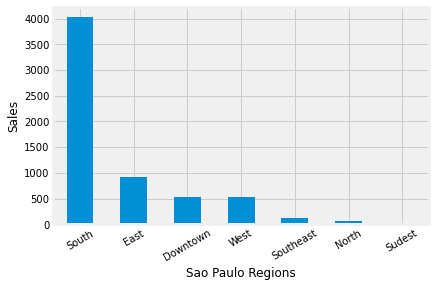

In [63]:
# Some Plot about this Data View
dfSalesPerRegionSP['Num_Sales'].plot(kind="bar")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Sao Paulo Regions")
plt.ylabel("Sales")
plt.show()

<div class="alert alert-block alert-success">
<h2>Tips About Number ot The Sales Per Rergion at São Paulo Statistics - São Paulo Sales Data</h2>
<ol>
    <li>South, East and Downtown are 3 greatest sales regions</li>
    <li>Southeast, North and Sudest are 3 smallest sales regions</li>    
</ol>
</div>

<div class="alert alert-block alert-warning">
<h3> Opportunities - Number ot The Sales Per Rergion at São Paulo</h3>
    <ol>
       <li><b>Increase number of sales in smallest regions</b></li>
       <li><b>Open new branchs on strong regions</b></li>
       <li><b>More regional marketing actions</b></li>       
    </ol>
</div>

In [64]:
# N# of Sales per Sao Paulo District - TOP 10
agg_Sales_Per_District_SP = {'Sale_ID': ['count'], 
                             'Total_Value': ['sum']                                               
                            }

dfSalesPerDistrictSP = dfSalesSPCity.groupby(['District_Name']).agg(agg_Sales_Per_District_SP) \
.sort_values(('Sale_ID', 'count'),ascending=False).nlargest(10,columns=(('Sale_ID', 'count')))
dfSalesPerDistrictSP.reset_index()
dfSalesPerDistrictSP

,Sale_ID,Total_Value
,count,sum
District_Name,,
Balcão,1703,67337.25
American Garden,476,20460.70
Eucalyptus Forest,420,16576.70
Sputnik Garden,275,10459.60
Aquarius Park,252,10054.70
Morumbi City,227,8622.00
Industry Garden,209,8483.60
Industrial Park,186,6895.60


In [65]:
# Change Aggregation Columns Names automated generated to more simple names
dfSalesPerDistrictSP.columns = dfSalesPerDistrictSP.columns.droplevel(1)
dfSalesPerDistrictSP.columns = ['Num_Sales','Total_Sales']

Text(0, 0.5, 'Sales')

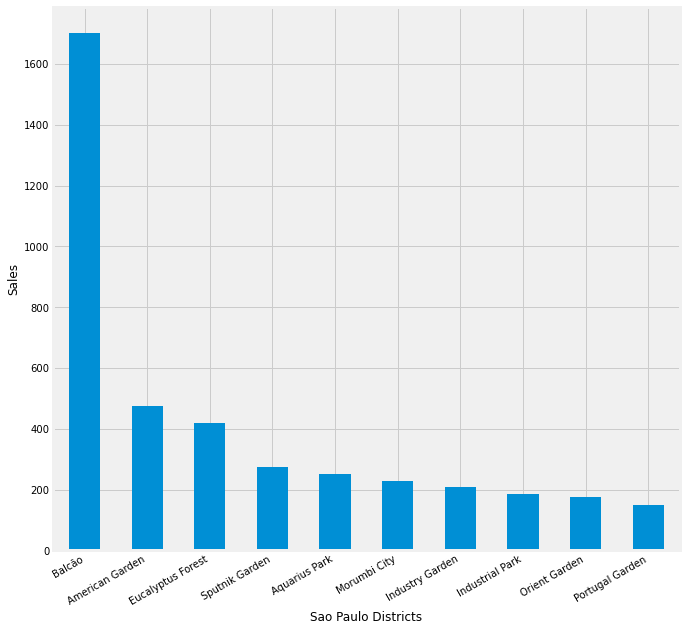

In [66]:
# Some Plot about this Data View
dfSalesPerDistrictSP['Num_Sales'].plot(kind="bar",figsize=(10,10))
plt.xticks(rotation=30, horizontalalignment="right")
plt.xlabel("Sao Paulo Districts")
plt.ylabel("Sales")

<div class="alert alert-block alert-success">
<h2>Number of Sales per Sao Paulo District - Top 10 - São Paulo Data</h2>
<ol>
    <li>Balcão is Generic District Name that does not have real district name registred.</li>
    <li>South Region confirms its leadership on sales by its regions, 8 of TOP 15 BEST!</li>    
</ol>
</div>

<div class="alert alert-block alert-warning">
<h3> Opportunities - Number of Sales per Sao Paulo District - Top 10</h3>
    <ol>
       <li><b>Districts <em>American Garden and/or Eucalyptus Forest</em> deserves its own store branch?</b></li> 
    </ol>
</div>

In [67]:
dfSalesSPCity.head()

,Sale_ID,Num_Items,Total_Value,City_Region,Payment_Method,Sale_City,District_Name,Sale_Mounth,Sale_Day,Sale_Day_Week,District_ID
0,41161,1,31.5,Downtown,Credit,Sao Paulo,Paulis Garden,3,1,Thursday,169.0
1,41162,1,26.5,South,Credit,Sao Paulo,Del Rey Garden,3,1,Thursday,125.0
2,41163,2,36.4,South,Credit,Sao Paulo,Industry Garden,3,1,Thursday,416.0
3,41164,2,59.0,South,Cash,Sao Paulo,Balcão,3,1,Thursday,0.0
4,41165,2,39.4,West,Credit,Sao Paulo,Dawn Garden,3,1,Thursday,95.0


In [68]:
# N# of Sales per Mouth on Sao Paulo City
agg_Sales_Per_Mounth = {'Sale_ID': ['count'], 
                             'Total_Value': ['sum']                                               
                            }
dfSalesPerMounthSP = dfSalesSPCity.groupby(['Sale_Mounth']).agg(agg_Sales_Per_Mounth) \
.sort_values(('Sale_ID', 'count'),ascending=False).nlargest(15,columns=(('Sale_ID', 'count')))
dfSalesPerMounthSP

,Sale_ID,Total_Value
,count,sum
Sale_Mounth,,
5,716,28718.95
4,682,26733.10
3,674,26892.10
7,661,26099.20
6,655,26512.90
8,578,23119.90
2,577,22022.90
9,549,22019.20


In [69]:
# Change Aggregation Columns Names automated generated to more simple names
dfSalesPerMounthSP.columns = dfSalesPerMounthSP.columns.droplevel(1)
dfSalesPerMounthSP.columns = ['Num_Sales','Total_Sales']

Text(0, 0.5, 'Total $')

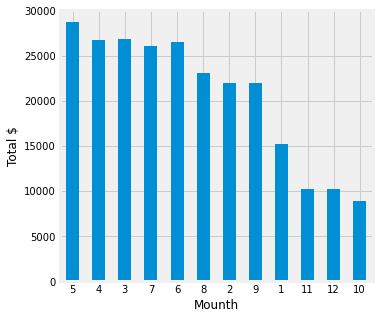

In [70]:
# Some Plot about this Data View
dfSalesPerMounthSP['Total_Sales'].plot(kind="bar",figsize=(5,5))
plt.xticks(rotation=0, horizontalalignment='center')
plt.xlabel("Mounth")
plt.ylabel("Total $")

<div class="alert alert-block alert-success">
<h2>Number of Sales per Mounth at Sao Paulo - São Paulo Data</h2>
<ol>
    <li>The period between febuary and september is the best for sale </li>
    <li>Mounths March, April and May are the best mouths for sale</li>    
</ol>
</div>

<div class="alert alert-block alert-warning">
<h3> Opportunities - Number of Sales per Mounth at Sao Paulo</h3>
    <ol>
       <li><b>Flyers can be distribute on mounths with smallest sales</b></li> 
    </ol>
</div>

In [71]:
# N# of Sales per Sale_Day_Week
agg_Sales_Per_Day_Week = {'Sale_ID': ['count'], 
                             'Total_Value': ['sum']                                               
                         }

dfSalesPerDayWeekSP = dfSalesSPCity.groupby(['Sale_Day_Week']).agg(agg_Sales_Per_Mounth).sort_values(('Sale_ID', 'count'),ascending=False)
dfSalesPerDayWeekSP

,Sale_ID,Total_Value
,count,sum
Sale_Day_Week,,
Saturday,1065,42187.15
Friday,1043,41413.80
Sunday,1014,39640.70
Thursday,831,33533.10
Tuesday,826,33152.40
Monday,741,28738.00
Wednesday,716,28072.40


In [72]:
# Change Aggregation Columns Names automated generated to more simple names
dfSalesPerDayWeekSP.columns = dfSalesPerDayWeekSP.columns.droplevel(1)
dfSalesPerDayWeekSP.columns = ['Num_Sales','Total_Sales']

Text(0, 0.5, 'Total $')

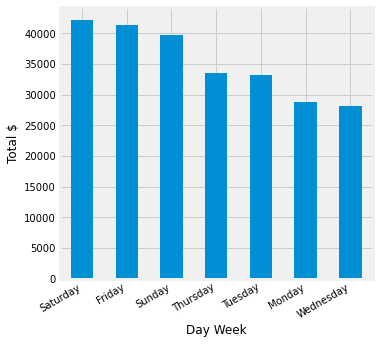

In [73]:
# Some Plot about this Data View
dfSalesPerDayWeekSP['Total_Sales'].plot(kind="bar",figsize=(5,5))
plt.xticks(rotation=30, horizontalalignment="right")

plt.xlabel("Day Week")
plt.ylabel("Total $")

<div class="alert alert-block alert-success">
<h2>Number of Sales per Day of Week - São Paulo Data</h2>
<ol>
    <li>Friday, Saturday and Sunday are the best days!</li>
    <li>Wednesday is the worst!</li>    
</ol>
</div>

<div class="alert alert-block alert-warning">
<h3> Opportunities - Number of Sales per Day of Week - São Paulo</h3>
    <ol>
       <li>Increase more marketing actions on Tuesday to get effect on Wednesday</li>
       <li>Create a promotion or discount for Wednesdays</li>  
    </ol>
</div>

In [74]:
# Sold Quantity per Product - Descending - All 25 types

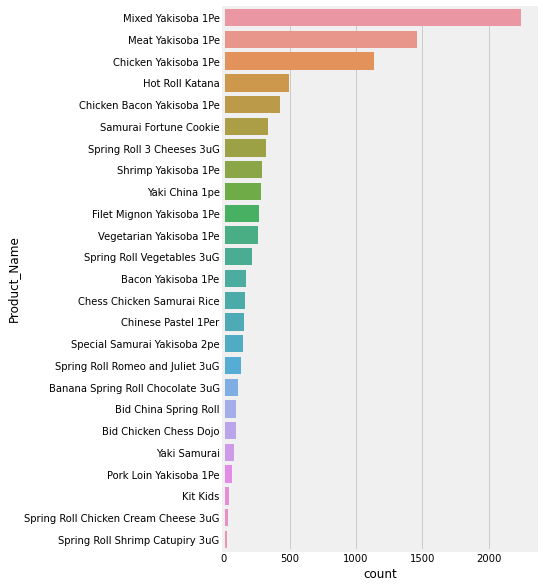

In [75]:
plt.figure(1,figsize=(5,10))
sns.countplot(y='Product_Name',data=dfDataFeatured,order=dfDataFeatured['Product_Name'].value_counts().index)
plt.show()

<div class="alert alert-block alert-success">
<h2>Sold Quantity per Product - Descending - All 25 types - All Data</h2>
<ol>
    <li>Mixed, Meat and Chicken Yakisova are the champions</li>
    <li>Kit Kids, Spring Roll Chicken Cream and Spring Roll Shrimp Catupiry are the worst</li>    
</ol>
</div>

<div class="alert alert-block alert-warning">
<h3> Opportunities - Sold Quantity per Product</h3>
    <ol>
       <li>Create promotions for champions items</li>
       <li>Discontinue the worst items from menu</li>  
    </ol>
</div>

In [76]:
# Sold Quantity per Portion - Descending - 5 types

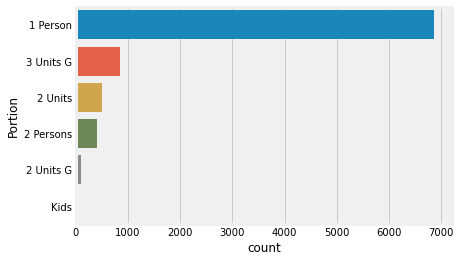

In [77]:
sns.countplot(y='Portion',data=dfDataFeatured,order=dfDataFeatured['Portion'].value_counts().index)
plt.show()

<div class="alert alert-block alert-success">
<h2>Sold Quantity per Product Portion - Descending - 5 types - All Data</h2>
<ol>
    <li> 1 Person Portion type is the champion</li>
    <li>Kids is the worst</li>    
</ol>
</div>

<div class="alert alert-block alert-warning">
<h3> Opportunities - Sold Quantity per Product Portion</h3>
    <ol>
       <li>Discount to promote 2 Persons Portion</li>
       <li>Discontinue Kids Portion Type from menu</li>  
    </ol>
</div>

In [78]:
# Sold Quantity per Preparation - Descending

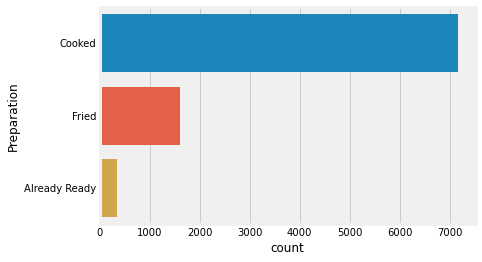

In [79]:
sns.countplot(y='Preparation',data=dfDataFeatured,order=dfDataFeatured['Preparation'].value_counts().index)
plt.show()

<div class="alert alert-block alert-success">
<h2>Sold Quantity per Food Preparation Type - Descending - All Data</h2>
<ol>
    <li> Cooked Food is the champion</li>
</ol>
</div>

<div class="alert alert-block alert-warning">
<h3> Opportunities - Sold Quantity per Food Preparation Type</h3>
    <ol>
       <li>Increase cooked menu items</li>
       <li>Emphazize the cooked food on marketing actions</li>  
    </ol>
</div>

<div class="alert alert-block alert-info">
<h2>06. Business Oportunity - Products Combos by Client Orders</h2>

> Based on sales historic, discover the best products match in order to increase sales creating combos.

</div>

<div class="alert alert-block alert-info">
<h2>06. Business Oportunity - Products Combos by Client Orders</h2>
<h3>06.1 Discouver Products Sold Together - All Data</h3>
</div>

In [80]:

dfProdsNamesConcatened = dfDataFeatured

# Handle Product Names 
dfProdsNamesConcatened['Product_Name'] = dfProdsNamesConcatened.Product_Name.replace(' ','_',regex=True)
dfProdsNamesConcatened_Dupli = dfProdsNamesConcatened[dfProdsNamesConcatened['Sale_ID'].duplicated(keep=False)]
dfProductsNamesTogehter =pd.DataFrame(dfProdsNamesConcatened_Dupli.groupby('Sale_ID')['Product_Name'].agg(' & '.join))
dfProductsNamesTogehter

,Product_Name
Sale_ID,
41163,Spring_Roll_Romeo_and_Juliet_3uG & Vegetarian_...
41164,Meat_Yakisoba_1Pe & Chicken_Yakisoba_1Pe
41165,Spring_Roll_Romeo_and_Juliet_3uG & Meat_Yakiso...
41168,Mixed_Yakisoba_1Pe & Spring_Roll_3_Cheeses_3uG
41169,Bacon_Yakisoba_1Pe & Vegetarian_Yakisoba_1Pe
...,...
48675,Meat_Yakisoba_1Pe & Meat_Yakisoba_1Pe
48676,Mixed_Yakisoba_1Pe & Mixed_Yakisoba_1Pe & Spri...
48679,Hot_Roll_Katana & Spring_Roll_3_Cheeses_3uG & ...


In [81]:
# Aggregation do Count Products Sold Together
agg_Produc_Names = {'Product_Name': ['count']}
dfProductsNamesTogehter.groupby('Product_Name').agg(agg_Produc_Names)

df = dfProductsNamesTogehter.groupby('Product_Name').agg(agg_Produc_Names).nlargest(20,columns=(('Product_Name', 'count')))
df

,Product_Name
,count
Product_Name,
Mixed_Yakisoba_1Pe & Mixed_Yakisoba_1Pe,140
Meat_Yakisoba_1Pe & Meat_Yakisoba_1Pe,79
Chicken_Yakisoba_1Pe & Chicken_Yakisoba_1Pe,46
Mixed_Yakisoba_1Pe & Hot_Roll_Katana,46
Hot_Roll_Katana & Mixed_Yakisoba_1Pe,44
Spring_Roll_3_Cheeses_3uG & Mixed_Yakisoba_1Pe,37
Mixed_Yakisoba_1Pe & Spring_Roll_3_Cheeses_3uG,31
Meat_Yakisoba_1Pe & Chicken_Yakisoba_1Pe,30


In [82]:
dfNamesTogetherCounted = df.reset_index()

In [83]:
dfNamesTogetherCounted.columns = ['ProductsTogether','Num_Together']

In [84]:
dfNamesTogetherCounted

,ProductsTogether,Num_Together
0,Mixed_Yakisoba_1Pe & Mixed_Yakisoba_1Pe,140
1,Meat_Yakisoba_1Pe & Meat_Yakisoba_1Pe,79
2,Chicken_Yakisoba_1Pe & Chicken_Yakisoba_1Pe,46
3,Mixed_Yakisoba_1Pe & Hot_Roll_Katana,46
4,Hot_Roll_Katana & Mixed_Yakisoba_1Pe,44
5,Spring_Roll_3_Cheeses_3uG & Mixed_Yakisoba_1Pe,37
6,Mixed_Yakisoba_1Pe & Spring_Roll_3_Cheeses_3uG,31
7,Meat_Yakisoba_1Pe & Chicken_Yakisoba_1Pe,30
8,Chicken_Yakisoba_1Pe & Meat_Yakisoba_1Pe,26
9,Spring_Roll_Vegetables_3uG & Mixed_Yakisoba_1Pe,26


In [85]:
# Treat doubles of reversed product names
dfProdsSoldTogetherFinal = pd.DataFrame(columns=['ProdsSoldTogether','Sales_Num'])

dfTrab = pd.DataFrame(dfNamesTogetherCounted['ProductsTogether'])
for index, row in dfTrab.iterrows(): 
    
    ProdsNamesTogether = row['ProductsTogether']
    ProdsNamesSplitted = ProdsNamesTogether.split(' & ')
    
    if (ProdsNamesSplitted[0]== ProdsNamesSplitted[1]):        
        continue
    else:
        Nome1 = str(ProdsNamesSplitted[0]).strip()        
        Nome2 = str(ProdsNamesSplitted[1]).strip()
        NomeInverso = Nome2 + ' & ' + Nome1
        NumTotalSalesProdsTogether = dfNamesTogetherCounted.loc[(dfNamesTogetherCounted['ProductsTogether'] == ProdsNamesTogether) | (dfNamesTogetherCounted['ProductsTogether'] == NomeInverso), 'Num_Together'].sum()        
        ind1 = dfNamesTogetherCounted[dfNamesTogetherCounted['ProductsTogether'] == ProdsNamesTogether].index
        ind2 = dfNamesTogetherCounted[dfNamesTogetherCounted['ProductsTogether'] == NomeInverso].index        
        dfNamesTogetherCounted.drop(ind1, inplace=True)
        dfNamesTogetherCounted.drop(ind2, inplace=True)                
        new_row = {'ProdsSoldTogether': ProdsNamesTogether,'Sales_Num':int(NumTotalSalesProdsTogether)}
        dfProdsSoldTogetherFinal = dfProdsSoldTogetherFinal.append(new_row, ignore_index=True)
        
dfProdsSoldTogetherFinal = dfProdsSoldTogetherFinal[dfProdsSoldTogetherFinal ['Sales_Num'] > 0]


In [86]:
dfProdsSoldTogetherFinal = dfProdsSoldTogetherFinal[dfProdsSoldTogetherFinal ['Sales_Num'] > 0]
dfProdsSoldTogetherFinal

,ProdsSoldTogether,Sales_Num
0,Mixed_Yakisoba_1Pe & Hot_Roll_Katana,90
2,Spring_Roll_3_Cheeses_3uG & Mixed_Yakisoba_1Pe,68
4,Meat_Yakisoba_1Pe & Chicken_Yakisoba_1Pe,56
6,Spring_Roll_Vegetables_3uG & Mixed_Yakisoba_1Pe,43
7,Chicken_Yakisoba_1Pe & Samurai_Fortune_Cookie,42
8,Meat_Yakisoba_1Pe & Spring_Roll_Vegetables_3uG,41
10,Hot_Roll_Katana & Meat_Yakisoba_1Pe,19
12,Meat_Yakisoba_1Pe & Spring_Roll_3_Cheeses_3uG,17
14,Hot_Roll_Katana & Chicken_Yakisoba_1Pe,16
15,Mixed_Yakisoba_1Pe & Spring_Roll_Romeo_and_Jul...,16


<div class="alert alert-block alert-success">
<h2> Most Doubles of Products Best Sold - Descending - All Data</h2>
<ol>
    <li> Mixed_Yakisoba_1Pe & Hot_Roll_Katana is the champion</li>
    <li> The Top 4 has at last one yakisoba type menu</li>
</ol>
</div>

<div class="alert alert-block alert-warning">
<h3> Opportunities - Most Doubles of Products Best Sold</h3>
    <ol>
       <li>Create some Products Combos to increase sales</li>
       <li>Create new Yakisoba menu items</li> 
    </ol>
</div>

<div class="alert alert-block alert-info">
<h2>07. Business Oportunity - Data Classification by Machine Learning</h2>

> By Machine Learning, classify sales items in groups per similarity.

> It will use unsupervised classification by K-Means Algorithm.

</div>

In [87]:
dfDataFeatured.head()

,Date,Sale_ID,Product_ID,Product_Name,Portion,Product_Type,Preparation,Product_Value,Payment_Method,Sale_City,District_ID,District_Name,City_Region,Sale_Year,Sale_Mounth,Sale_Day,Sale_Day_Week,Sale_Week_Num
0,2018-01-09,47917,3,Chicken_Yakisoba_1Pe,1 Person,Food,Cooked,28.9,Payment On-line,Sao Paulo,18.0,Eucalyptus Forest,South,2018,1,9,Tuesday,2
1,2018-01-09,47918,47,Chess_Chicken_Samurai_Rice,2 Persons,Food,Cooked,30.9,Credit,Sao Paulo,97.0,American Garden,East,2018,1,9,Tuesday,2
2,2018-01-09,47918,49,Hot_Roll_Katana,2 Units,Food,Fried,16.9,Credit,Sao Paulo,97.0,American Garden,East,2018,1,9,Tuesday,2
3,2018-01-09,47919,47,Chess_Chicken_Samurai_Rice,2 Persons,Food,Cooked,30.9,Credit,Sao Paulo,179.0,Sant Ines Garden I,East,2018,1,9,Tuesday,2
4,2018-01-09,47920,49,Hot_Roll_Katana,2 Units,Food,Fried,16.9,Cash,Sao Paulo,146.0,Marian Garden,East,2018,1,9,Tuesday,2


In [88]:
# Create Categories for some columns to Modeling
dfDataFeatured['Portion']= pd.Categorical(dfDataFeatured['Portion'])
dfDataFeatured['Portion_Cat'] = dfDataFeatured['Portion'].cat.codes
dfDataFeatured['Portion'] = dfDataFeatured['Portion'].astype(str)

dfDataFeatured['City_Region']= pd.Categorical(dfDataFeatured['City_Region'])
dfDataFeatured['City_Region_Cat'] = dfDataFeatured['City_Region'].cat.codes
dfDataFeatured['City_Region'] = dfDataFeatured['City_Region'].astype(str)

dfDataFeatured.head()


,Date,Sale_ID,Product_ID,Product_Name,Portion,Product_Type,Preparation,Product_Value,Payment_Method,Sale_City,District_ID,District_Name,City_Region,Sale_Year,Sale_Mounth,Sale_Day,Sale_Day_Week,Sale_Week_Num,Portion_Cat,City_Region_Cat
0,2018-01-09,47917,3,Chicken_Yakisoba_1Pe,1 Person,Food,Cooked,28.9,Payment On-line,Sao Paulo,18.0,Eucalyptus Forest,South,2018,1,9,Tuesday,2,0,3
1,2018-01-09,47918,47,Chess_Chicken_Samurai_Rice,2 Persons,Food,Cooked,30.9,Credit,Sao Paulo,97.0,American Garden,East,2018,1,9,Tuesday,2,1,1
2,2018-01-09,47918,49,Hot_Roll_Katana,2 Units,Food,Fried,16.9,Credit,Sao Paulo,97.0,American Garden,East,2018,1,9,Tuesday,2,2,1
3,2018-01-09,47919,47,Chess_Chicken_Samurai_Rice,2 Persons,Food,Cooked,30.9,Credit,Sao Paulo,179.0,Sant Ines Garden I,East,2018,1,9,Tuesday,2,1,1
4,2018-01-09,47920,49,Hot_Roll_Katana,2 Units,Food,Fried,16.9,Cash,Sao Paulo,146.0,Marian Garden,East,2018,1,9,Tuesday,2,2,1


In [89]:
# Cluster per Product_ID, Portion_Cat and City_Region_Cat

In [90]:
X1 = dfDataFeatured[['Product_ID','Portion_Cat','City_Region_Cat']].iloc[: , :].values
X1

array([[ 3,  0,  3],
       [47,  1,  1],
       [49,  2,  1],
       ...,
       [37,  4,  1],
       [21,  0,  1],
       [44,  1,  1]], dtype=int32)

In [91]:
wcss_X1 = []

In [92]:
# Figure out the best cluster number fit for these three columns

In [93]:
for n in range(2, 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(X1)
    wcss_X1.append(modelo.inertia_)

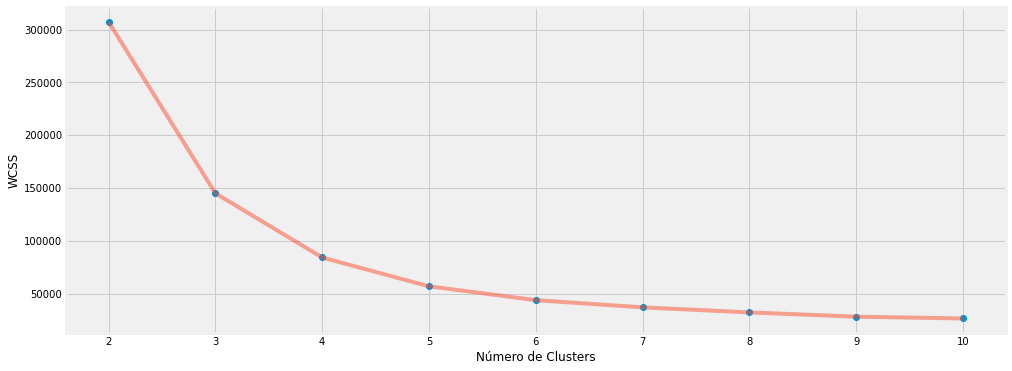

In [94]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , wcss_X1 , 'o')
plt.plot(np.arange(2 , 11) , wcss_X1 , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('WCSS')
plt.show()

In [95]:
# The smaller WCSS is better as Elbow Curve is showing
# K Value as 3, seems to be a good number of the group for clustering.

In [96]:
# Create a Model Object with its hyper parameters

In [97]:
modelo_seg1 = KMeans(n_clusters = 3, 
                     init = 'k-means++', 
                     n_init = 10, 
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan')

In [98]:
# Model apply its algorithm against data
modelo_seg1.fit(X1)

KMeans(algorithm='elkan', n_clusters=3, random_state=111)

In [99]:
# Get Labels (Groups ID) generated by ML Model

In [100]:
labels1 = modelo_seg1.labels_

In [101]:
labels1

array([2, 0, 0, ..., 0, 1, 0])

In [102]:
centroids1 = modelo_seg1.cluster_centers_

In [103]:
# Create Dataframe with Model Labels List
df_Labels = pd.DataFrame({'Label':labels1})
df_Labels.head()
df_Labels_indx = df_Labels
df_Labels_indx.columns
df_Labels_indx

,Label
0,2
1,0
2,0
3,0
4,0
...,...
9099,2
9100,0
9101,0
9102,1


In [104]:
# Concatenat DataFrame Sales Items with DataFrame Labels
df_Clustered = pd.concat([dfDataFeatured,df_Labels_indx], axis=1)
df_Clustered.head()

,Date,Sale_ID,Product_ID,Product_Name,Portion,Product_Type,Preparation,Product_Value,Payment_Method,Sale_City,...,District_Name,City_Region,Sale_Year,Sale_Mounth,Sale_Day,Sale_Day_Week,Sale_Week_Num,Portion_Cat,City_Region_Cat,Label
0,2018-01-09,47917,3,Chicken_Yakisoba_1Pe,1 Person,Food,Cooked,28.9,Payment On-line,Sao Paulo,...,Eucalyptus Forest,South,2018,1,9,Tuesday,2,0,3,2
1,2018-01-09,47918,47,Chess_Chicken_Samurai_Rice,2 Persons,Food,Cooked,30.9,Credit,Sao Paulo,...,American Garden,East,2018,1,9,Tuesday,2,1,1,0
2,2018-01-09,47918,49,Hot_Roll_Katana,2 Units,Food,Fried,16.9,Credit,Sao Paulo,...,American Garden,East,2018,1,9,Tuesday,2,2,1,0
3,2018-01-09,47919,47,Chess_Chicken_Samurai_Rice,2 Persons,Food,Cooked,30.9,Credit,Sao Paulo,...,Sant Ines Garden I,East,2018,1,9,Tuesday,2,1,1,0
4,2018-01-09,47920,49,Hot_Roll_Katana,2 Units,Food,Fried,16.9,Cash,Sao Paulo,...,Marian Garden,East,2018,1,9,Tuesday,2,2,1,0


In [105]:
df_Clustered.shape

(9104, 21)

<div class="alert alert-block alert-info">
<h2>07. Business Oportunity - Data Classification by Machine Learning</h2>
<h3>06.1 Insight 01 - Grouping Clustered Data by Labels (Groups ID), summing Total Sales and its Values</h3>
</div>

In [106]:
# Insight 01
agg_Cluster_Insight_01 = {'Sale_ID': ['count'], 
                             'Product_Value': ['sum']                                               
                            }
dfInsight_01 = df_Clustered.groupby(['Label']).agg(agg_Cluster_Insight_01) \
.sort_values(('Sale_ID', 'count'),ascending=False).nlargest(15,columns=(('Sale_ID', 'count')))

In [107]:
dfInsight_01.columns = ['Num_Sales','Tota_Value_Sales']

In [108]:
dfInsight_01

,Num_Sales,Tota_Value_Sales
Label,,
1,3595,114813.90
2,3027,89975.90
0,2482,42637.85


<div class="alert alert-block alert-warning">
<h3> Opportunities - Insight 0 - Grouping Clustered Data by Labels (Groups ID), summing Total Sales and its Valued</h3>
    <ol>
       <li>What are the similarities inside Label 0 Group? Based on reponse, the board can implement many actions in order to make Label 1 group became Label 0</li>
       <li>What are the similarities inside Label 1 Group that produces this smallest sales number</li> 
    </ol>
</div>

<div class="alert alert-block alert-info">
<h2>07. Business Oportunity - Data Classification by Machine Learning</h2>
<h3>06.2 Insight 02 - Grouping Clustered Data by Labels (Groups ID and Product Name), summing Total Sales and its Values</h3>
</div>

In [109]:
# Insight 02
agg_Cluster_Insight_02 = {'Sale_ID': ['count'], 
                             'Product_Value': ['sum']                                               
                            }
dfInsight_02 = df_Clustered.groupby(['Label','Product_Name']).agg(agg_Cluster_Insight_02) #\
                # .sort_values(('Product_Value', 'sum'),ascending=False) 
                #.nlargest(15,columns=(('Sale_ID', 'count')))

In [110]:
dfInsight_02.columns = dfInsight_02.columns.droplevel(1)
dfInsight_02.columns = ['Num_Sales','Tota_Sales_Value']

In [111]:
dfInsight_02

Num_Sales  Tota_Sales_Value
Label Product_Name                                                     
0     Banana_Spring_Roll_Chocolate_3uG            108           1325.70
      Bid_Chicken_Chess_Dojo                       97           2518.30
      Bid_China_Spring_Roll                        98            578.70
      Chess_Chicken_Samurai_Rice                  163           5069.20
      Hot_Roll_Katana                             498           8579.70
      Samurai_Fortune_Cookie                      341            355.60
      Special_Samurai_Yakisoba_2pe                152           6282.90
      Spring_Roll_3_Cheeses_3uG                   320           3717.40
      Spring_Roll_Chicken_Cream_Cheese_3uG         34            507.60
      Spring_Roll_Romeo_and_Juliet_3uG            136           1623.60
      Spring_Roll_Shrimp_Catupiry_3uG              28            436.70
      Spring_Roll_Vegetables_3uG                  219           2930.70
      Yaki_China_1pe                              288           8711.75
1     Chicken_Bacon_Yakisoba_1Pe                  430          13436.70
      Chinese_Pastel_1Per                         160           2229.30
      Filet_Mignon_Yakisoba_1Pe                   267           9958.00
      Kit_Kids                                     47            939.70
      Mixed_Yakisoba_1Pe                         2246          71587.90
      Pork_Loin_Yakisoba_1Pe                       69           2165.60
      Shrimp_Yakisoba_1Pe                         291          11331.40
      Yaki_Samurai                                 85           3165.30
2     Bacon_Yakisoba_1Pe                          173           5203.40
      Chicken_Yakisoba_1Pe                       1133          31860.80
      Meat_Yakisoba_1Pe                          1459          45778.80
      Vegetarian_Yakisoba_1Pe                     262           7132.90

<div class="alert alert-block alert-warning">
<h3> Opportunities - Insight 2 - Grouping Clustered Data by Labels (Groups ID and Product Name), summing Total Sales and its Valued</h3>
    <ol>
       <li>Label 0 shows most menu items that must maintain the quality</li>
       <li>The Menu Items Chicken Yakisoba 1Pe, Hot Roll Katana and Chicken Bacon Yakisoba 1Pe, Mixed Yakisoba 1Pe are the big sales champions</li>
       <li>Product from Label 0, most profitable label, could be the source of new products, portions and combos</li>
    </ol>
</div>